In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, Normalizer, Binarizer,OrdinalEncoder,RobustScaler,MaxAbsScaler,PowerTransformer
df=sns.load_dataset('tips')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
numeric_cols=['tip', 'size']
categoric_cols=['sex', 'smoker', 'day', 'time']

preprocessor=ColumnTransformer(transformers=[
    ('one_hot_encoder', OneHotEncoder(), categoric_cols),
    ('standard_scaler', StandardScaler(), numeric_cols)
])

X=df.drop('total_bill',axis=1)
y=df['total_bill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('random_forest', RandomForestRegressor())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('RMSE',root_mean_squared_error(y_test, y_pred))
print('MAPE',mean_absolute_percentage_error(y_test, y_pred))


Mean Squared Error: 43.00055321305512
Mean Absolute Error: 4.694878334511294
R-squared: 0.49284949104124864
RMSE 6.557480706266326
MAPE 0.30719413510741833


# **Random Forest Classifier**

In [19]:
df=sns.load_dataset('tips')
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [20]:
numeric_col=['total_bill','tip', 'size']
categoric_col=['smoker', 'day', 'time']

preprocessor=ColumnTransformer(transformers=[
    ('one_hot_encoder', OneHotEncoder(), categoric_col),
    ('standard_scaler', StandardScaler(), numeric_col)
])

X=df.drop('sex',axis=1)
y=df['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('random_forest', RandomForestClassifier(n_estimators=100,random_state=42))])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1:', f1_score(y_test, y_pred, average='macro'))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))


Accuracy: 0.6530612244897959
Precision: 0.6285714285714286
Recall: 0.6105263157894737
F1: 0.6116550116550117
Confusion Matrix: [[ 8 11]
 [ 6 24]]
Classification Report:               precision    recall  f1-score   support

      Female       0.57      0.42      0.48        19
        Male       0.69      0.80      0.74        30

    accuracy                           0.65        49
   macro avg       0.63      0.61      0.61        49
weighted avg       0.64      0.65      0.64        49



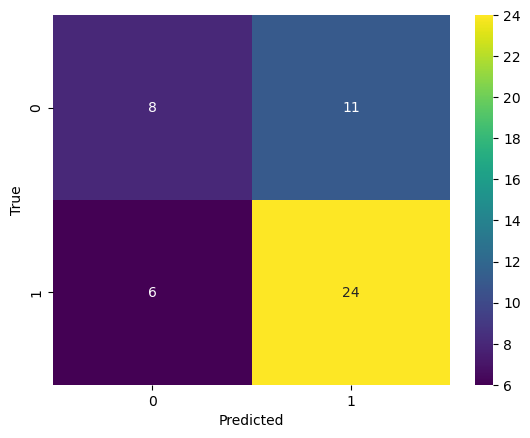

In [21]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()